In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def find_bounds(data_array):
    q1, q3 = np.percentile(data_array,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return lower_bound, upper_bound

In [67]:
def remove_outliers(data_array):
    data_array.sort()
    l_b, u_b = find_bounds(data_array)
    return [value for value in data_array if value >= l_b and value <= u_b]

In [78]:
def time_estimate_minutes(iterations, seconds_per_iteration):
    total_time_seconds = seconds_per_iteration * iterations
    total_time_minutes = total_time_seconds / 60
    return total_time_minutes

In [75]:
def print_stats(df):
    maxObj = df[['Total_Turns','Rounds_of_War', 'Cards_Played_Each']].max()
    print("\nMAX INFORMATION")
    print(maxObj)
    minObj = df[['Total_Turns','Rounds_of_War', 'Cards_Played_Each']].min()
    print("\nMIN INFORMATION")
    print(minObj)
    avgObj = df[['Total_Turns','Rounds_of_War', 'Cards_Played_Each']].mean()
    print("\nMEAN INFORMATION")
    print(avgObj)
    medianObj = df[['Total_Turns','Rounds_of_War', 'Cards_Played_Each']].median()
    print("\nMEDIAN INFORMATION")
    print(medianObj)

In [76]:
df = pd.read_csv('game_log.csv')
df['Cards_Played_Each'] = df['Total_Turns'] + (df['Rounds_of_War'] * 3)
df['id'] = [i for i in range(len(df['Total_Turns']))]
df['Card_Movements'] = df['Cards_Played_Each'] + df['Total_Turns']
df

,Total_Turns,Rounds_of_War,Winner,Cards_Played_Each,id,Card_Movements
0,616,38,Player 1,730,0,1346
1,282,16,Player 1,330,1,612
2,293,19,Player 1,350,2,643
3,383,22,Player 2,449,3,832
4,134,5,Player 2,149,4,283
...,...,...,...,...,...,...
59995,175,12,Player 2,211,59995,386
59996,1152,82,Player 1,1398,59996,2550
59997,248,20,Player 2,308,59997,556
59998,188,14,Player 1,230,59998,418


In [77]:
print_stats(df)


MAX INFORMATION
Total_Turns          3232
Rounds_of_War         195
Cards_Played_Each    3817
dtype: int64

MIN INFORMATION
Total_Turns          13
Rounds_of_War         0
Cards_Played_Each    27
dtype: int64

MEAN INFORMATION
Total_Turns          327.628317
Rounds_of_War         20.142483
Cards_Played_Each    388.055767
dtype: float64

MEDIAN INFORMATION
Total_Turns          248.0
Rounds_of_War         15.0
Cards_Played_Each    294.0
dtype: float64


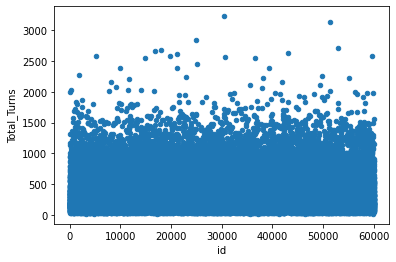

In [51]:
df.plot(x='id', y='Total_Turns', kind='scatter')

In [79]:
number_turns = list(df['Total_Turns'])
card_movements = list(df['Card_Movements'])

number_turns = remove_outliers(number_turns)
card_movements = remove_outliers(card_movements)

avg_turns = np.average(number_turns)
avg_movements = np.average(card_movements)

print('AVERAGE NUMBER TURNS IN A GAME OF WAR: {}'.format(avg_turns))
print('AVERAGE NUMBER CARD MOVEMENTS IN A GAME OF WAR: {}'.format(avg_movements))

AVERAGE NUMBER TURNS IN A GAME OF WAR: 286.72246557101306
AVERAGE NUMBER CARD MOVEMENTS IN A GAME OF WAR: 626.5471906372094


In [81]:
ESTIMATED_SECONDS_PER_TURN = 15
ESTIMATED_SECONDS_PER_CARD_MOVEMENT = 3

time_estimate_by_turns = time_estimate_minutes(avg_turns, ESTIMATED_SECONDS_PER_TURN)
time_estimate_by_movements = time_estimate_minutes(avg_movements, ESTIMATED_SECONDS_PER_CARD_MOVEMENT)

print('GAME TIME ESTIMATE BY TURNS: {}'.format(time_estimate_by_turns))
print('GAME TIME ESTIMATE BY CARD MOVEMENTS: {}'.format(time_estimate_by_movements))

GAME TIME ESTIMATE BY TURNS: 71.68061639275327
GAME TIME ESTIMATE BY CARD MOVEMENTS: 31.327359531860466
